In [1]:
using PyPlot

In [2]:
name = "mk-omni"

if ispath(name) == true
    rm(name, recursive=true)
end
mkdir(name)

if isfile("$(name).zip") == true
    rm("$(name).zip")
end

In [3]:
R3(θ) = 
[[cos(θ) -sin(θ) 0];
 [sin(θ)  cos(θ) 0];
 [0       0       1]];

R2(θ) = 
[[cos(θ) -sin(θ)];
 [sin(θ)  cos(θ)];
];

R3i(θ) = inv(R3(θ));

# Three omni-wheel robot

In [4]:
J2o = eye(3)

J1o(α1, β1, α2, β2, α3, β3, l) = [
    [sin(α1 + β1)   -cos(α1 + β1)   -l * cos(β1)];
    [sin(α2 + β2)   -cos(α2 + β2)   -l * cos(β2)];
    [sin(α3 + β3)   -cos(α3 + β3)   -l * cos(β3)];
]

j1o = J1o(π/3, 0, π, 0, -π/3, 0, 1)

j1oi = pinv(j1o);

x = 0
y = 0
θ = 0

v1 = rand() * 0.05 + 0.05;
v2 = rand() * 0.05 + 0.05;
v3 = rand() * 0.05 + 0.05;

N = 2500
data = zeros(N, 6)

for i = 1:N
    if i % 10 == 0
        v1 = v1 + randn() * 0.05 - 0.015
        v2 = v2 + randn() * 0.05 - 0.015
        v3 = v3 + randn() * 0.05 - 0.015
    end
    
    v1 = max(-0.1, min(0.3, v1))
    v2 = max(-0.1, min(0.3, v2))
    v3 = max(-0.1, min(0.3, v3))

    r = R3i(θ) * j1oi * J2o * [v1; v2; v3];

    x = x + r[1]
    y = y - r[2]
    θ = θ + r[3]

    data[i, 1] = x
    data[i, 2] = y
    data[i, 3] = θ
    data[i, 4] = v1
    data[i, 5] = v2
    data[i, 6] = v3
end

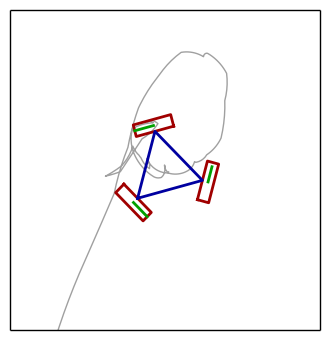

In [5]:
omni(θ) = [
    (R2(θ + π/3) * [1.0; 0.0])';
    (R2(θ + π)   * [1.0; 0.0])';
    (R2(θ - π/3) * [1.0; 0.0])';
    (R2(θ + π/3) * [1.0; 0.0])';
]

omni_wheel(θ) = [
    (R2(θ) * [1.0; -0.5])';
    (R2(θ) * [1.3; -0.5])';
    (R2(θ) * [1.3;  0.5])';
    (R2(θ) * [1.0;  0.5])';
    (R2(θ) * [1.0; -0.5])';
]

omni_wheel_speed(θ,v) = [
    (R2(θ) * [1.15; 0])';
    (R2(θ) * [1.15; v * 5])'
]

function plotomni(d, index)
    xo = d[index, 1]
    yo = d[index, 2]
    θ  = d[index, 3]
    v1 = d[index, 4]
    v2 = d[index, 5]
    v3 = d[index, 6]
    p  = d[:,1:2]

    fig = figure(figsize=(4,4))
    ylim(yo-4, yo+4)
    xlim(xo-4, xo+4)
    xticks([])
    yticks([])
    
    plot(p[:,1], p[:,2], color = "#A0A0A0", lw=1.0)
    
    w1 = omni_wheel(θ + π/3)
    w1 = reshape(w1, 5, 2)
    x = [w1[i,1] for i = 1:size(w1)[1]]
    y = [w1[i,2] for i = 1:size(w1)[1]]
    plot(x + xo, y + yo, color = "#A00000", lw= 2.0)

    w1v = omni_wheel_speed(θ + π/3, -v1)
    w1v = reshape(w1v, 2, 2)
    x = [w1v[i,1] for i = 1:size(w1v)[1]]
    y = [w1v[i,2] for i = 1:size(w1v)[1]]
    plot(x + xo, y + yo, color = "#00A000", lw= 2.0)

    w2 = omni_wheel(θ + π)
    w2 = reshape(w2, 5, 2)
    x = [w2[i,1] for i = 1:size(w2)[1]]
    y = [w2[i,2] for i = 1:size(w2)[1]]
    plot(x + xo, y + yo, color = "#A00000", lw= 2.0)

    w2v = omni_wheel_speed(θ + π, -v2)
    w2v = reshape(w2v, 2, 2)
    x = [w2v[i,1] for i = 1:size(w2v)[1]]
    y = [w2v[i,2] for i = 1:size(w2v)[1]]
    plot(x + xo, y + yo, color = "#00A000", lw= 2.0)

    
    w3 = omni_wheel(θ - π/3)
    w3 = reshape(w3, 5, 2)
    x = [w3[i,1] for i = 1:size(w3)[1]]
    y = [w3[i,2] for i = 1:size(w3)[1]]
    plot(x + xo, y + yo, color = "#A00000", lw= 2.0)

    w3v = omni_wheel_speed(θ - π/3, -v3)
    w3v = reshape(w3v, 2, 2)
    x = [w3v[i,1] for i = 1:size(w3v)[1]]
    y = [w3v[i,2] for i = 1:size(w3v)[1]]
    plot(x + xo, y + yo, color = "#00A000", lw= 2.0)

    
    cr=[omni(θ)[i,:]' for i = 1:size(omni(θ))[1]]
    x = [c[1] for c in cr]
    y = [c[2] for c in cr]
    plot(x + xo, y + yo, color = "#0000A0", lw= 2.0)
    
    fig
end

plotomni(data,200)

In [6]:
for i=1:size(data)[1]
    fig = plotomni(data,i);
    savefig("$name/robot_$(i-1).png", bbox_inches="tight")
    close(fig)
end

LoadError: LoadError: InterruptException:
while loading In[6], in expression starting on line 1

In [ ]:
run(`zip -r $name $name`)
rm(name, recursive=true)